In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df=pd.merge(mouse_metadata,study_results)
df

# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
len(df['Mouse ID'].unique())


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df.duplicated(subset=['Mouse ID','Timepoint'])
df.loc[df.duplicated(subset=['Mouse ID','Timepoint'],keep=False),'Mouse ID'].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

df.loc[df.duplicated(subset=['Mouse ID','Timepoint'],keep=False)]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_data=df.loc[df['Mouse ID']!='g989']

In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_data['Mouse ID'].unique())

248

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
tumor_mean=clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
tumor_median=clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
tumor_var=clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
tumor_std=clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
tumor_sem=clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
tumor_df=pd.DataFrame({'Tumor Volume Mean':tumor_mean,'Tumor Volume Median':tumor_median,
                       'Tumor Volume Variance':tumor_var,'Tumor Volume Std':tumor_std,
                      'Tumor Volume SEM':tumor_sem})
tumor_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
clean_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','sem','var','std']}) 

Tumor Volume (mm3)                                          
                           mean     median       sem        var       std
Drug Regimen                                                             
Capomulin             40.675741  41.557809  0.329346  24.947764  4.994774
Ceftamin              52.591172  51.776157  0.469821  39.290177  6.268188
Infubinol             52.884795  51.820584  0.492236  43.128684  6.567243
Ketapril              55.235638  53.698743  0.603860  68.553577  8.279709
Naftisol              54.331565  52.509285  0.596466  66.173479  8.134708
Placebo               54.033581  52.288934  0.581331  61.168083  7.821003
Propriva              52.320930  50.446266  0.544332  43.852013  6.622085
Ramicane              40.216745  40.673236  0.320955  23.486704  4.846308
Stelasyn              54.233149  52.431737  0.573111  59.450562  7.710419
Zoniferol             53.236507  51.818479  0.516398  48.533355  6.966589

Text(0, 0.5, 'Tumor Volume')

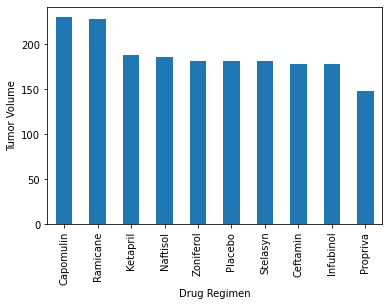

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
clean_data['Drug Regimen'].value_counts().plot(kind='bar')

plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume')


Text(0, 0.5, 'Tumor Volume')

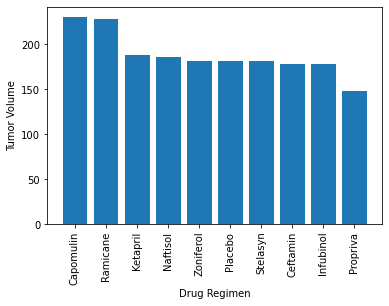

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
data=clean_data['Drug Regimen'].value_counts()
plt.bar(data.index,data.values)
plt.xticks(rotation=90)

plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume')


<AxesSubplot:title={'center':'Gender Distribution'}, ylabel='Sex'>

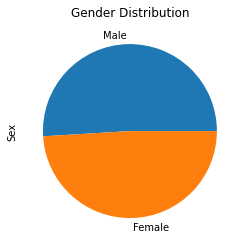

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
clean_data['Sex'].value_counts().plot(kind='pie',title='Gender Distribution')


Text(0.5, 1.0, 'Gender Distribution')

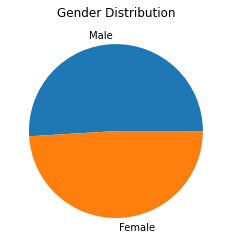

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
data2=clean_data['Sex'].value_counts()
sizes=data2.values
labels=data2.index
plt.pie(sizes,labels=labels)
plt.title('Gender Distribution')

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_times=clean_data.groupby('Mouse ID',as_index=False)['Timepoint'].max()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
new_df=pd.merge(clean_data,max_times)

In [14]:
new_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [20]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers.   
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset  
    # Determine outliers using upper and lower bounds
    

drugs=['Ramicane', 'Capomulin', 'Infubinol', 'Ceftamin',]
temp_outliers=[]
for drug in drugs:

    tmp=clean_data.loc[clean_data['Drug Regimen']==drug,'Tumor Volume (mm3)']
    
    temp_outliers.append(tmp)
    
    quartiles=tmp.quantile([.25,.5,.75])
    lower_bound=quartiles[.25]
    upper_bound=quartiles[.75]
    iqr=upper_bound-lower_bound

    upper_outlier=upper_bound+(1.5*iqr)
    lower_outlier=lower_bound-(1.5*iqr)
    outliers=tmp.loc[(tmp>upper_outlier) | (tmp<lower_outlier)]
    print(f"Outliers for {drug}:\n {outliers.values}")

Outliers for Ramicane:
 [22.05012627]
Outliers for Capomulin:
 [25.47214326 23.34359787]
Outliers for Infubinol:
 []
Outliers for Ceftamin:
 []


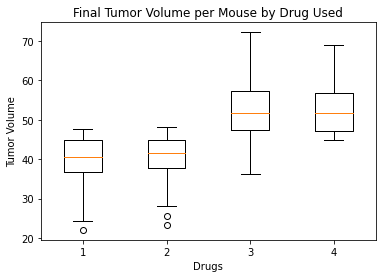

In [44]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax=plt.subplots()
plt.boxplot(temp_outliers)
plt.xlabel('Drugs')
plt.ylabel('Tumor Volume')
plt.title('Final Tumor Volume per Mouse by Drug Used')
plt.show()

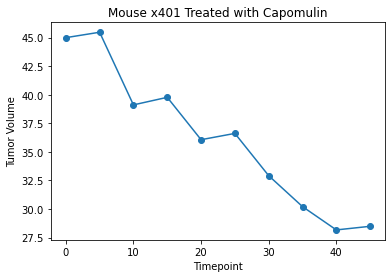

In [48]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
x401=clean_data.loc[clean_data['Mouse ID']=='x401']
x401
x_axis=x401['Timepoint']
y_axis=x401['Tumor Volume (mm3)']

plt.scatter(x_axis,y_axis)
plt.plot(x_axis,y_axis)

plt.title('Mouse x401 Treated with Capomulin')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.show()


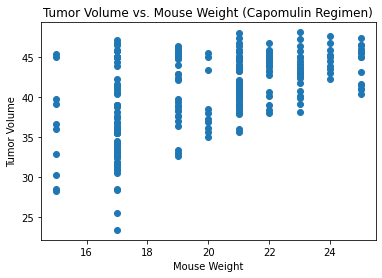

In [49]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
tumor_weight=clean_data.loc[clean_data['Drug Regimen']=='Capomulin']
x_axis=tumor_weight['Weight (g)']
y_axis=tumor_weight['Tumor Volume (mm3)']

plt.scatter(x_axis, y_axis)

plt.title('Tumor Volume vs. Mouse Weight (Capomulin Regimen)')
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume')
plt.show()

In [50]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
lin_reg=clean_data.loc[clean_data['Drug Regimen']=='Capomulin']
weight=lin_reg.iloc[:,5]
tumor_volume=lin_reg.iloc[:,7]
st.pearsonr(weight,tumor_volume)


(0.5840064422319758, 1.9983343777966753e-22)

In [ ]:
#Capomulin seems to be very effective at reducing tumor volume
#Capomuline seems to have a stronger effect on smaller mice
#Ramicane seems to be effective at reducing tumor volume as well